# 随机森林两种方式：Bagging+决策树
# 或者用 sklearn 中专门的随机森林

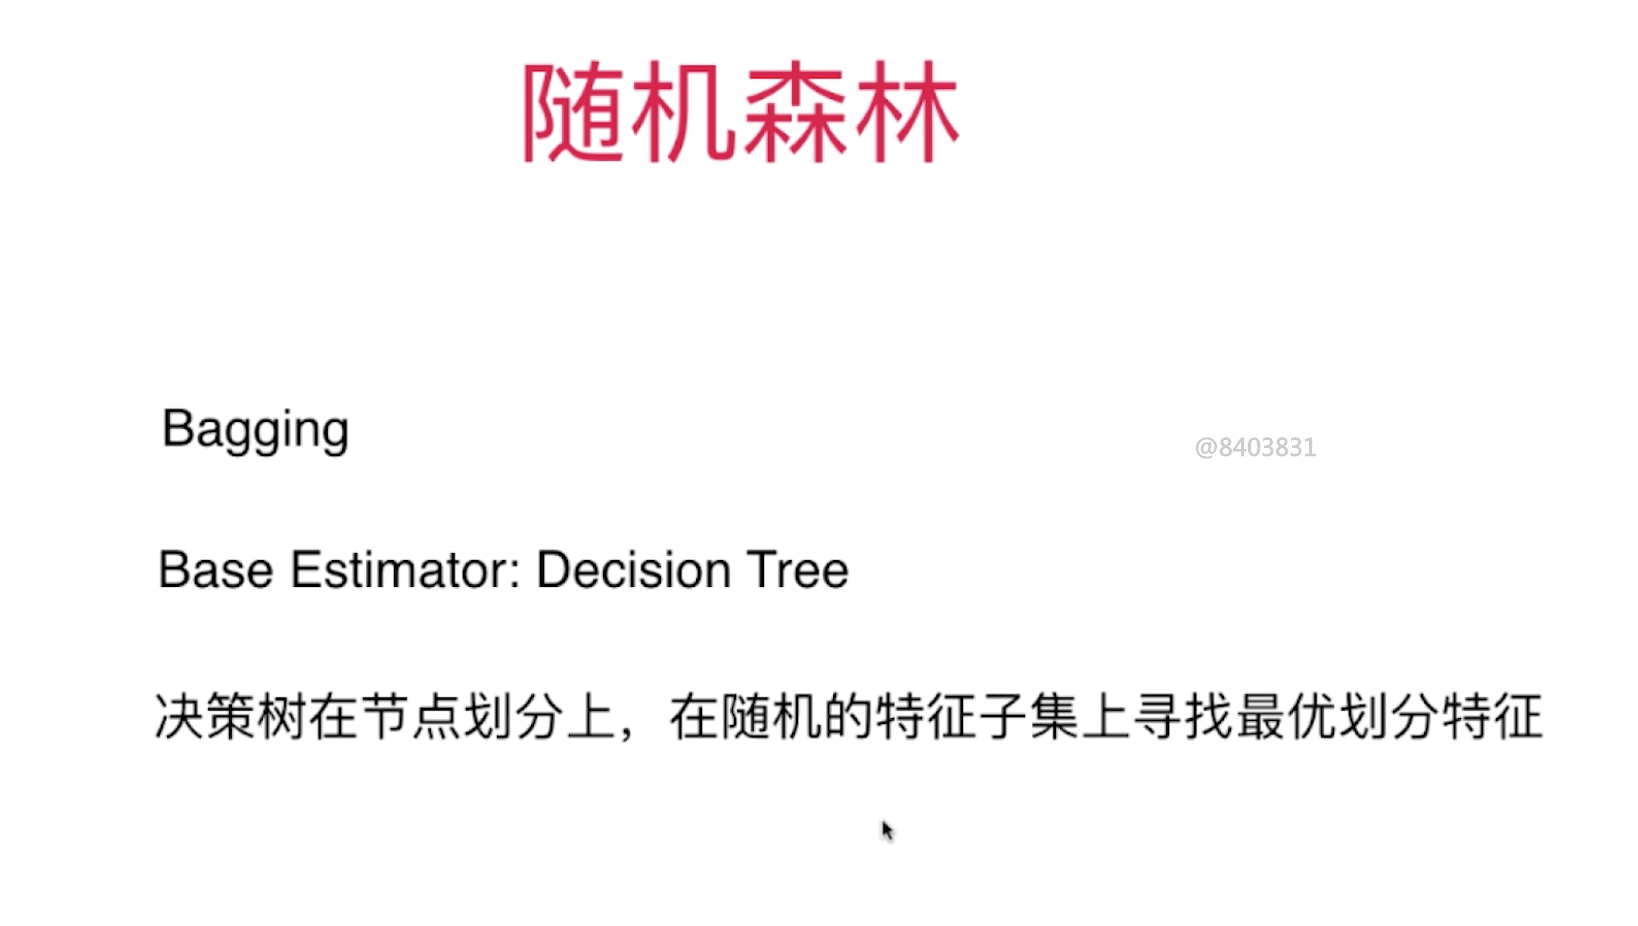

# Extra-Tree: 更随机的随机森林

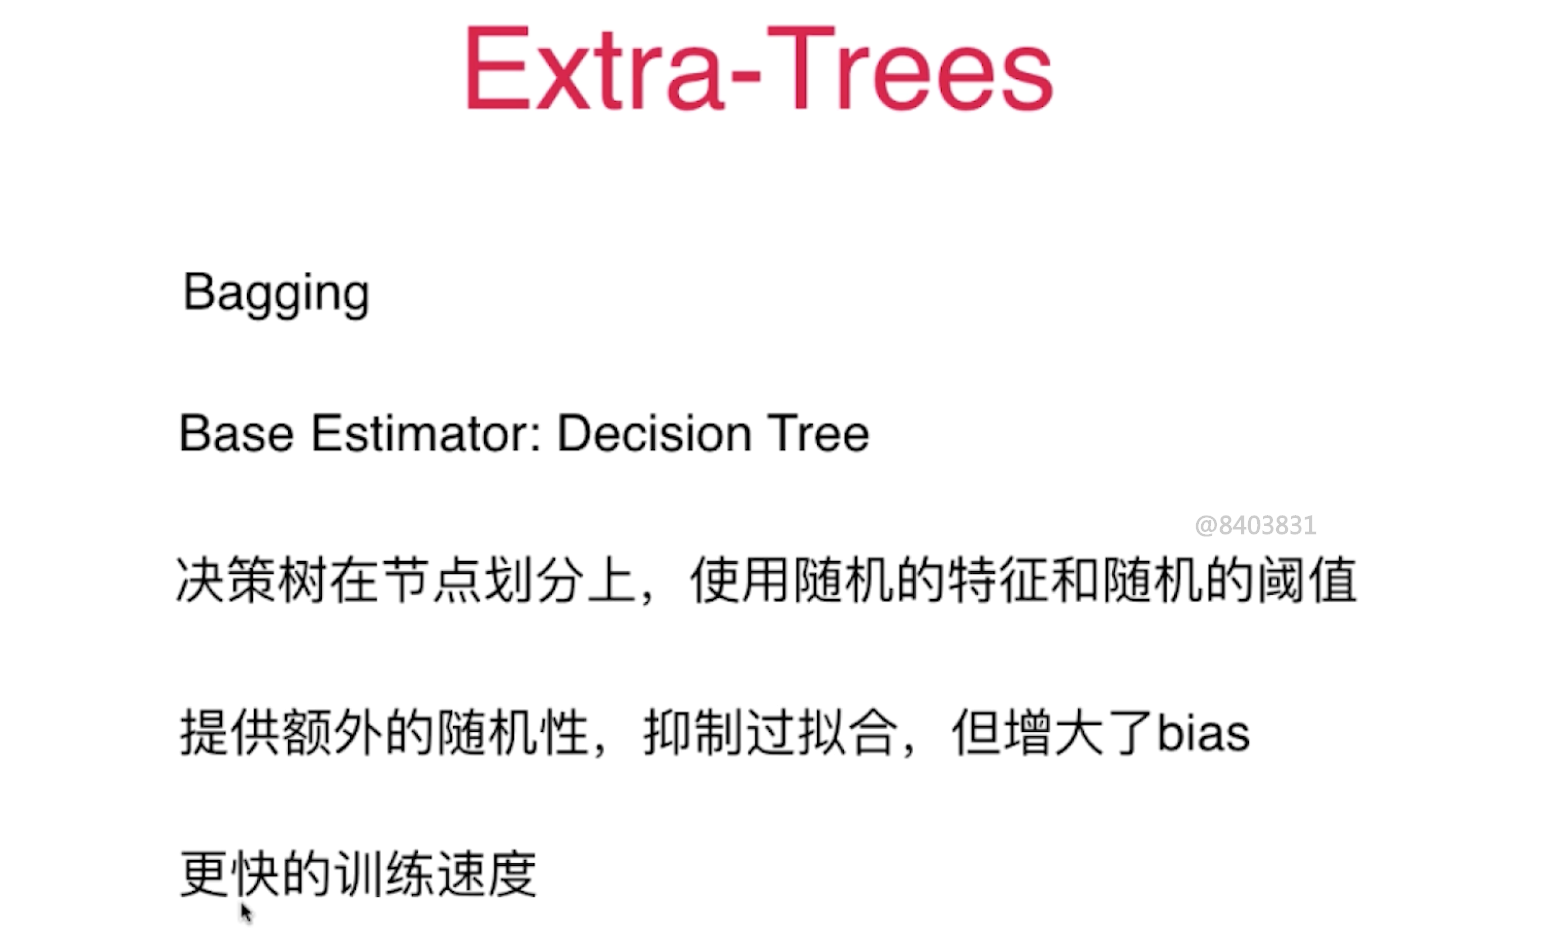

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

X, y = datasets.make_moons(n_samples=500, noise=0.3, random_state=42)

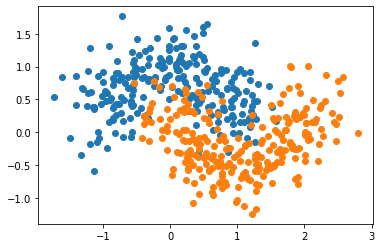

In [3]:
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

### 随机森林

In [4]:
from sklearn.ensemble import RandomForestClassifier

# n_estimators多少棵树, 支持oob_score
rf_clf = RandomForestClassifier(n_estimators=500, random_state=666, oob_score=True,
                                           n_jobs=-1)
rf_clf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=True, random_state=666, verbose=0,
                       warm_start=False)

In [5]:
rf_clf.oob_score_

0.896

In [7]:
# max_leaf_nodes 每棵决策树最多多少叶子
rf_clf2 = RandomForestClassifier(n_estimators=500, random_state=666, 
                                               max_leaf_nodes=16,
                                               oob_score=True,
                                               n_jobs=-1)
rf_clf2.fit(X, y)
rf_clf2.oob_score_

0.92

### 使用Extra-Trees

In [9]:
from sklearn.ensemble import ExtraTreesClassifier

et_clf = ExtraTreesClassifier(n_estimators=500, bootstrap=True, oob_score=True,
                                         random_state=666)
et_clf.fit(X,y)
et_clf.oob_score_

0.892

### 集成学习解决回归问题

In [10]:
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor